In [12]:
#For data Visualisation
import seaborn as sns

In [13]:
# Matplotlib for additional customization

from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
# Pandas for managing datasets
import pandas as pd

In [15]:
#Reading csv file with first column as index
df=pd.read_csv("/Users/tusharnema/Desktop/Pokemon.csv",index_col=0,encoding = "ISO-8859-1")

In [18]:
#Displaying first 5 rows
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [19]:
#Describing column names
df.columns.values

array(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary'], dtype=object)

## lmplot ##

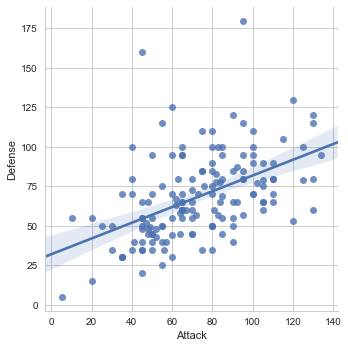

In [113]:
sns.lmplot(x='Attack', y='Defense', data=df)
plt.show()
 

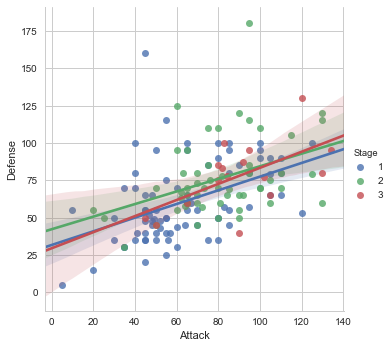

In [114]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=True, # Regression line
           hue='Stage')   # Color by evolution stage
plt.show()

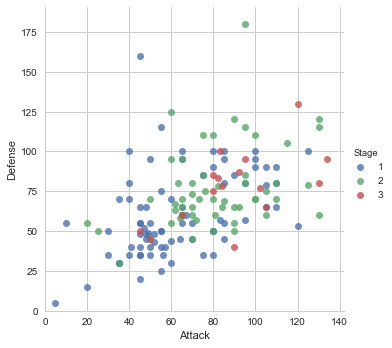

In [115]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()

## Boxplot ##

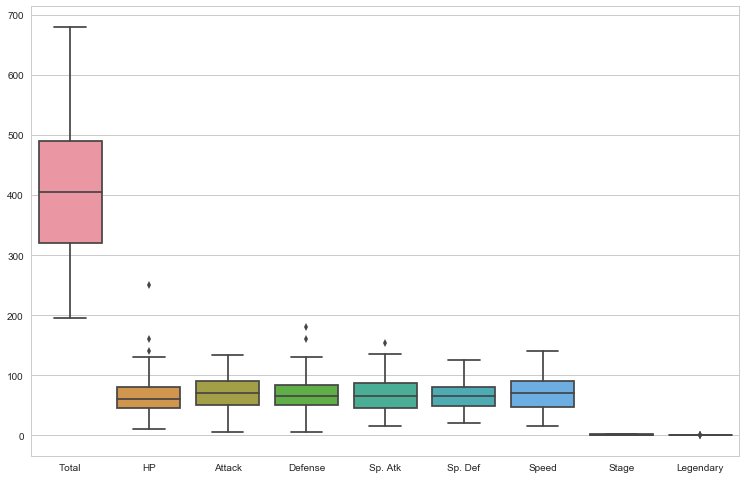

In [116]:
# Boxplot
sns.boxplot(data=df)
plt.show()

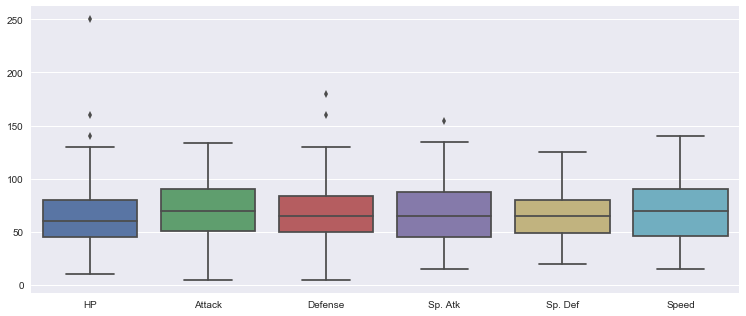

In [62]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

# New boxplot using stats_df
y=sns.boxplot(data=stats_df)

sns.set(rc={'figure.figsize':(12.7,8.27)})

## Violin Plot##

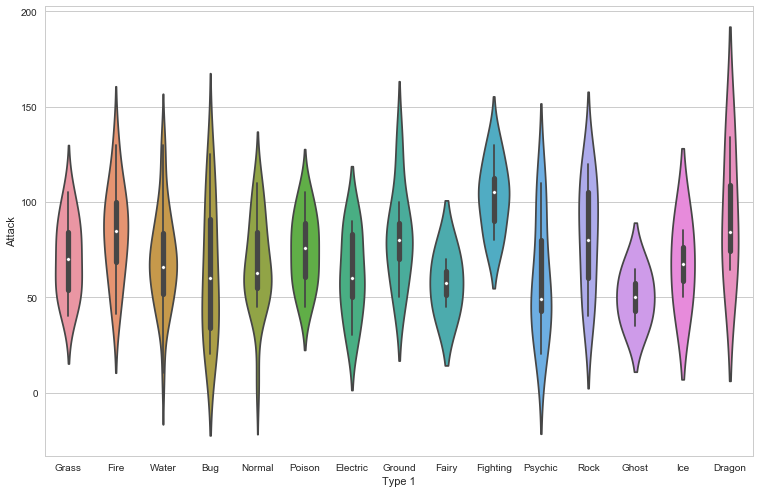

In [64]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)
plt.show()

In [65]:
#We can actually define colors for each feature on the x axis

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

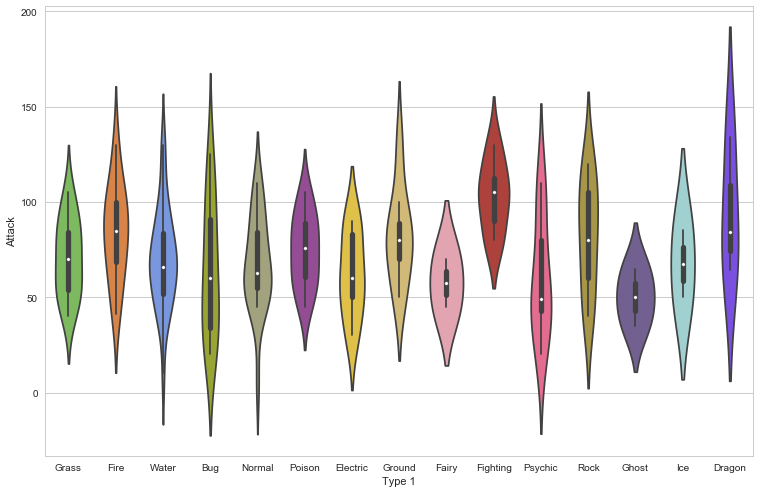

In [67]:
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette
plt.show()

## Swarm Plot ##

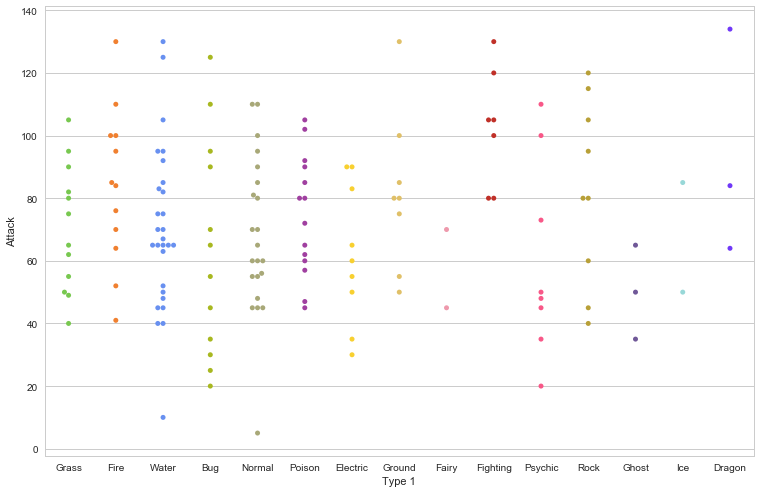

In [69]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)
plt.show()

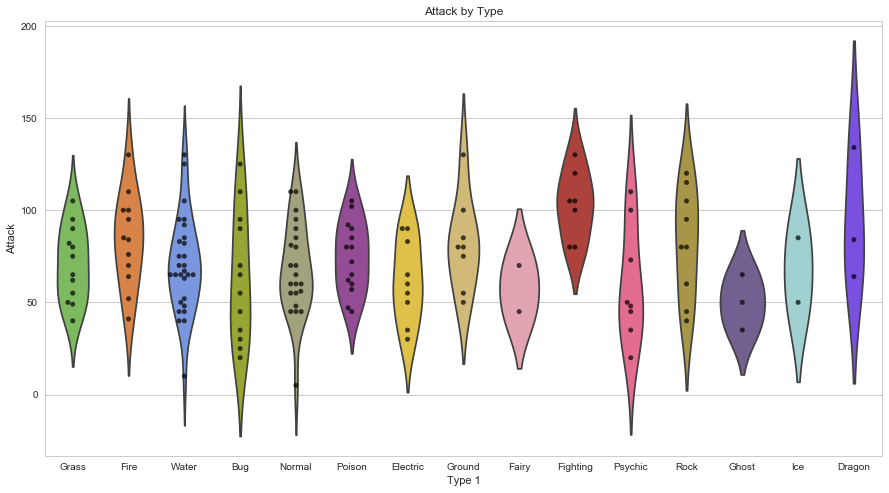

In [73]:
#Mixing the swarm and violet plot
# Set figure size with matplotlib
plt.figure(figsize=(15,8))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')
plt.show()

In [76]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [87]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stats") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stats,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [89]:
print( stats_df.shape )
print( melted_df.shape )


(151, 9)
(906, 5)


In [90]:
#we find that melted_df has 6 times the number of rows as stats_df.

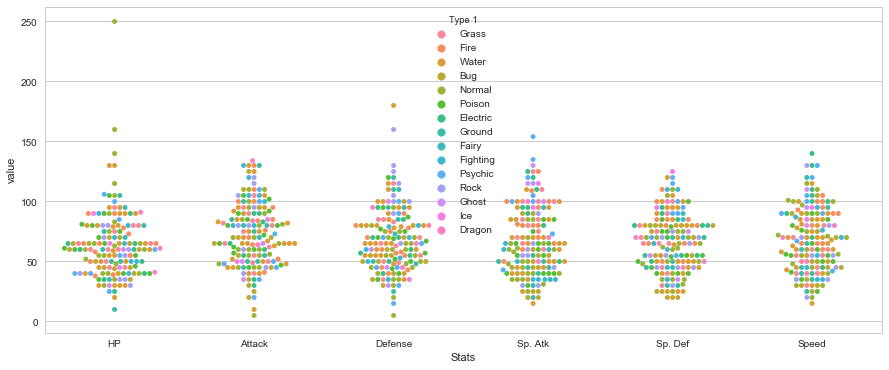

In [101]:
# Swarmplot with melted_df
plt.figure(figsize=(15,6))
sns.swarmplot(x='Stats', y='value', data=melted_df, 
              hue='Type 1')
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


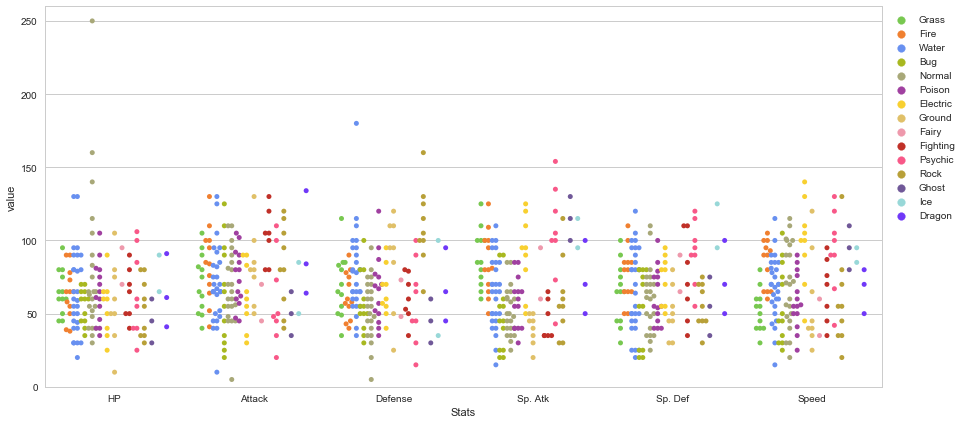

In [105]:
# 1. Enlarge the plot
plt.figure(figsize=(15,7))
 
sns.swarmplot(x='Stats', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

## Heat Map ##

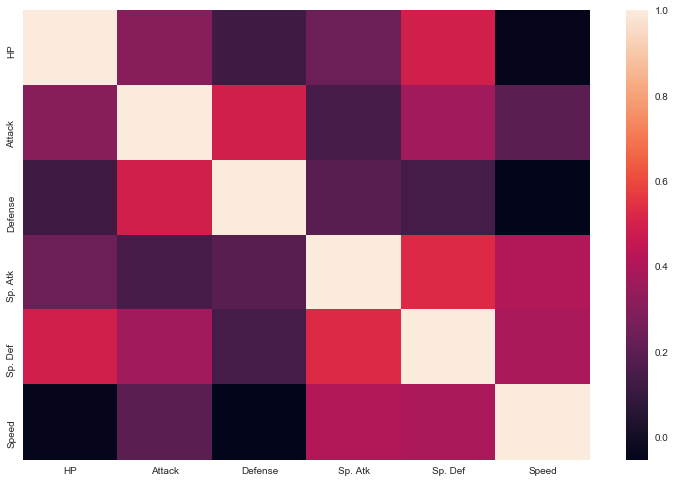

In [106]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

## Distribution Plot ##

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


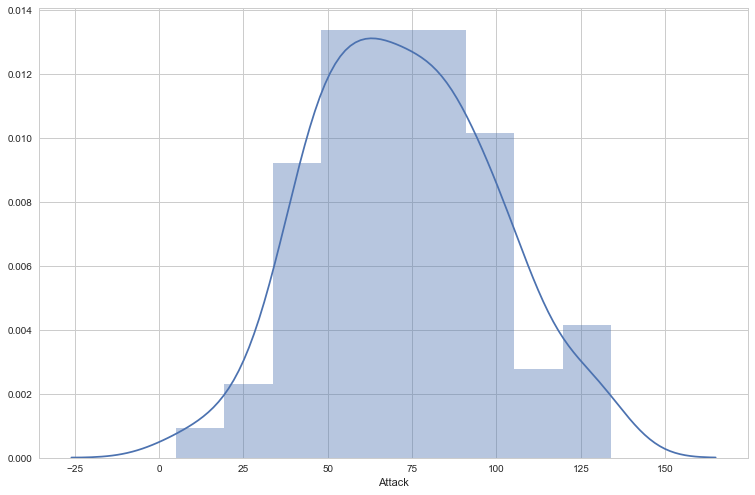

In [108]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)
plt.show()

## Count Plot ##

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

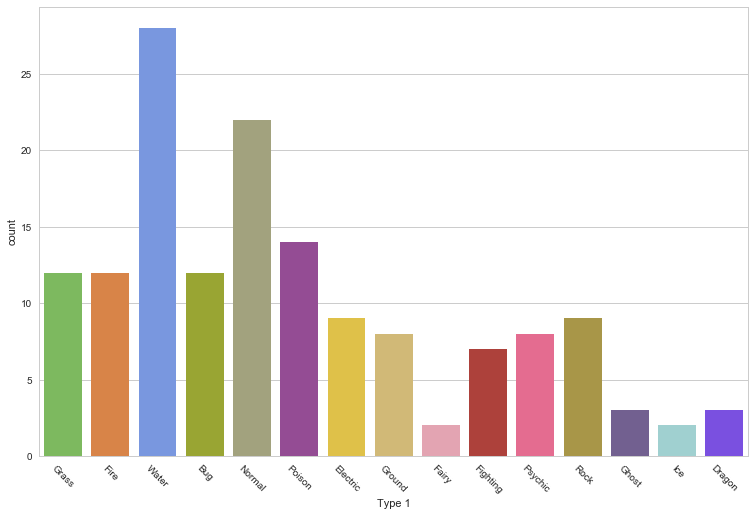

In [109]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

## Factor Plot ##

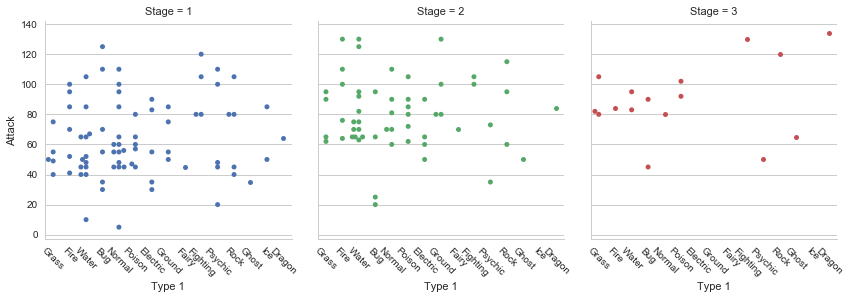

In [110]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

## Density Plot ##

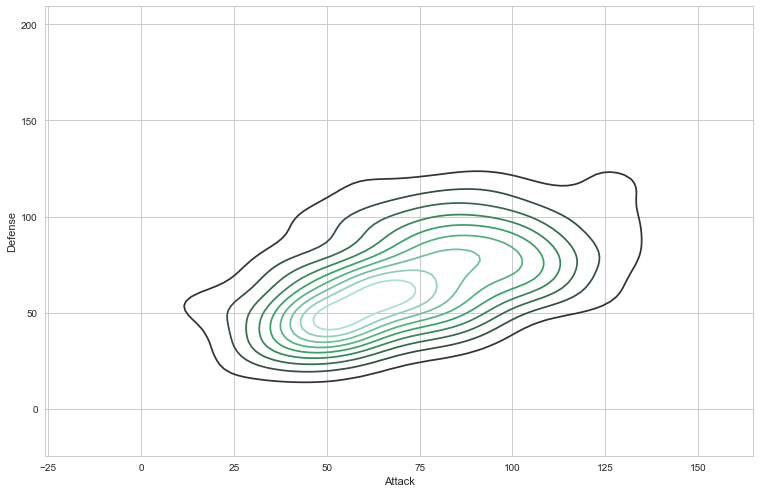

In [111]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)